In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
import os

In [2]:
#RUNNING IN JUPYTER
os.chdir("C:\\Users\\rarsi\\Rutgers University\\Michelle Chen - COVID_Fatigue\\RC_award\\Data\\Concatenated_Data\\HRV_features")
#os.chdir("C:\\Users\\katgm\\Rutgers University\\Michelle Chen - Rutgers_Neuropsych_Lab\\COVID_Fatigue\\RC_award\\Data\\Concatenated_Data\\Padasip_Clean_Data")

In [3]:
f_path = "HRV_features_BlockLevel_withDelta.xlsx"
og_data = pd.read_excel(f_path, header=0)
og_data.head()

,Unnamed: 0,Block,SubjID,Fatigue_Rating,Age,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,...,Delta_HRV_SDRMSSD,Change_from_Baseline_HRV_SDRMSSD,Delta_HRV_Prc20NN,Change_from_Baseline_HRV_Prc20NN,Delta_HRV_HF,Change_from_Baseline_HRV_HF,Delta_HRV_HFD,Change_from_Baseline_HRV_HFD,Delta_HRV_LZC,Change_from_Baseline_HRV_LZC
0,0,0,Cov4,73,38,754.876139,113.005049,26.951449,104.236707,10.01841,...,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,Cov4,82,38,767.857143,118.329781,34.008529,111.348149,NaN,...,0.026449,0.026449,15.625,15.625,0.001388,0.001388,-0.027743,-0.027743,-0.033584,-0.033584
2,2,2,Cov4,82,38,755.166997,117.852649,39.101073,111.234560,NaN,...,-0.009397,0.017052,-15.625,0.000,-0.000836,0.000551,0.004485,-0.023258,-0.074824,-0.108408
3,3,3,Cov4,86,38,789.471419,136.276233,44.170195,125.032054,NaN,...,-0.015098,0.001954,15.625,15.625,-0.002950,-0.002399,0.026965,0.003707,0.032553,-0.075854
4,4,4,Cov4,84,38,768.864829,114.462897,23.968917,112.300671,NaN,...,-0.015976,-0.014022,0.000,15.625,-0.009351,-0.011750,-0.007814,-0.004107,0.028722,-0.047132


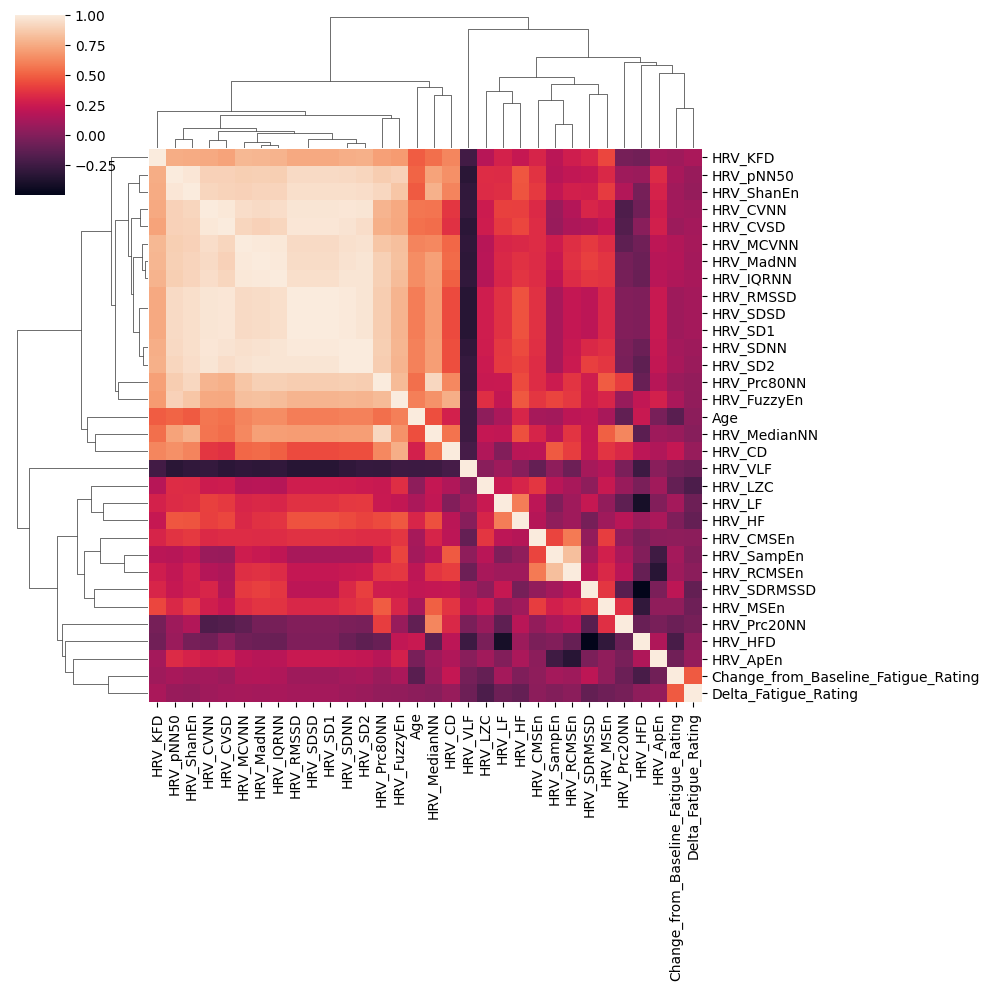

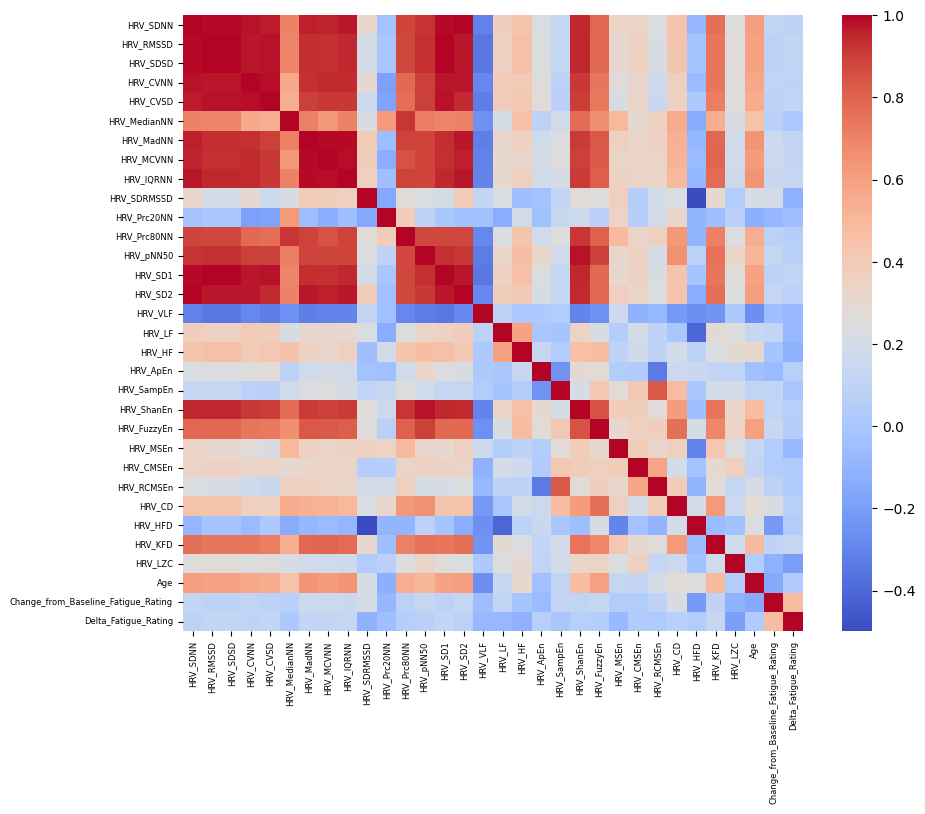

In [4]:
# Select HRV features for correlation analysis
features = og_data[['HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',	'HRV_CVSD', 'HRV_MedianNN',	'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',	'HRV_SDRMSSD',	'HRV_Prc20NN',	'HRV_Prc80NN',
 'HRV_pNN50', 'HRV_SD1','HRV_SD2', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_ApEn',	'HRV_SampEn',	'HRV_ShanEn',	'HRV_FuzzyEn',	'HRV_MSEn',	'HRV_CMSEn',	'HRV_RCMSEn',	'HRV_CD',	'HRV_HFD',	'HRV_KFD',	'HRV_LZC',
'Age', 'Change_from_Baseline_Fatigue_Rating', 'Delta_Fatigue_Rating']]  # Update with actual feature columns

#'HRV_DFA_alpha1',	'HRV_MFDFA_alpha1_Width',	'HRV_MFDFA_alpha1_Peak',	'HRV_MFDFA_alpha1_Mean',	'HRV_MFDFA_alpha1_Max',	'HRV_MFDFA_alpha1_Delta',	'HRV_MFDFA_alpha1_Asymmetry',

correlation_matrix = features.corr()

# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt


sns.clustermap(correlation_matrix, annot=False)
plt.show()

# Calculate the p-value matrix to find significant correlations
from scipy.stats import pearsonr

pval_matrix = correlation_matrix.copy()
for i in range(len(pval_matrix.columns)):
    for j in range(len(pval_matrix.columns)):
        _, pval = pearsonr(og_data[correlation_matrix.columns[i]], og_data[correlation_matrix.columns[j]])
        pval_matrix.iloc[i, j] = pval

# Customize the figure size
plt.figure(figsize=(10, 8))
# Mask for insignificant correlations
mask_non_significant = np.where(pval_matrix > 0.05, True, False)

# Heatmap with significance mask
ax=sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Customize the axis font size
ax.tick_params(axis='both', which='major', labelsize=10)  # Set axis label size
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 6)  # Set X axis font size
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 6)  # Set Y axis font size

plt.show()



                            Spearman_Correlation
HRV_SDRMSSD                             0.243879
HRV_DFA_alpha1                          0.194122
HRV_RCMSEn                              0.188324
HRV_MFDFA_alpha1_Delta                  0.155153
HRV_MFDFA_alpha1_Peak                   0.142860
HRV_SampEn                              0.140630
HRV_LF                                  0.122009
HRV_CD                                  0.121480
HRV_MFDFA_alpha1_Max                    0.107682
HRV_MedianNN                            0.077547
HRV_FuzzyEn                             0.059681
HRV_MadNN                               0.056759
HRV_SD2                                 0.049088
HRV_MCVNN                               0.048742
HRV_IQRNN                               0.039278
HRV_CVNN                                0.028042
HRV_pNN50                               0.025199
HRV_HF                                  0.020934
HRV_SDNN                                0.017087
HRV_ShanEn          

C:\Users\rarsi\AppData\Local\Temp\ipykernel_14124\1528168942.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_with_highest_corr = spearman_df.idxmax()[0]


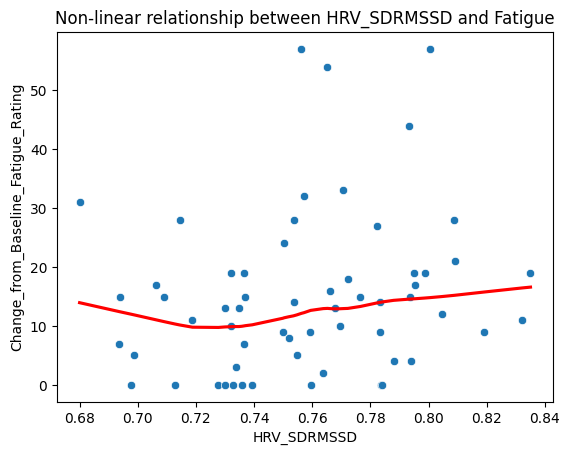

In [5]:
from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression

# Assuming 'data'=features is your DataFrame with HRV features and 'Fatigue' is the target variable
# Load your data here if it's not already loaded
# data = pd.read_excel('path_to_your_data.xlsx')

features = og_data[['HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',	'HRV_CVSD', 'HRV_MedianNN',	'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',	'HRV_SDRMSSD',	'HRV_Prc20NN',	'HRV_Prc80NN',
 'HRV_pNN50', 'HRV_SD1','HRV_SD2', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_ApEn',	'HRV_SampEn',	'HRV_ShanEn',	'HRV_FuzzyEn',	'HRV_MSEn',	'HRV_CMSEn',	'HRV_RCMSEn',	'HRV_CD',	'HRV_HFD',	'HRV_KFD',	'HRV_LZC',
'HRV_DFA_alpha1',	'HRV_MFDFA_alpha1_Width',	'HRV_MFDFA_alpha1_Peak',	'HRV_MFDFA_alpha1_Mean',	'HRV_MFDFA_alpha1_Max',	'HRV_MFDFA_alpha1_Delta',	'HRV_MFDFA_alpha1_Asymmetry',
 'Age', 'Change_from_Baseline_Fatigue_Rating']]  # Update with actual feature columns


# Calculate Spearman's rank correlation coefficient
spearman_correlations = {}
for feature in features.columns.drop('Change_from_Baseline_Fatigue_Rating'):
    spearman_correlations[feature], _ = spearmanr(features[feature], features['Change_from_Baseline_Fatigue_Rating'])

# Convert the dictionary to a DataFrame for easier manipulation and sorting
spearman_df = pd.DataFrame.from_dict(spearman_correlations, orient='index', columns=['Spearman_Correlation'])
spearman_df.sort_values('Spearman_Correlation', ascending=False, inplace=True)

# Print Spearman rank correlation coefficients
print(spearman_df)

# Calculate mutual information
x = features.drop('Change_from_Baseline_Fatigue_Rating', axis=1)
y = features['Change_from_Baseline_Fatigue_Rating']
mi_scores = mutual_info_regression(x, y)
mi_scores_df = pd.DataFrame(mi_scores, index=x.columns, columns=['Mutual_Information'])
mi_scores_df.sort_values('Mutual_Information', ascending=False, inplace=True)

# Print mutual information scores
print(mi_scores_df)

# Scatter plot with non-linear fit for the feature with the highest non-linear correlation
feature_with_highest_corr = spearman_df.idxmax()[0]
sns.scatterplot(data=features, x=feature_with_highest_corr, y='Change_from_Baseline_Fatigue_Rating')
sns.regplot(data=features, x=feature_with_highest_corr, y='Change_from_Baseline_Fatigue_Rating', scatter=False, lowess=True, color='r')
plt.title(f'Non-linear relationship between {feature_with_highest_corr} and Fatigue')
plt.show()


In [6]:

import pandas as pd
import numpy as np
from scipy.stats import rankdata
from scipy.signal import decimate
import math
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def hoeffding(*arg):
  
    if(len(arg)==1):
      if isinstance(arg[0], pd.DataFrame):
        if(arg[0].shape[0]>1):
          return arg[0].apply(lambda x: arg[0].apply(lambda y: hoeffding(x.values, y.values)))
    else:
      if(len(arg)==2):
        if type(arg[0]) is not np.ndarray:
          if (len(arg[0].shape)>1):
            return print("ERROR inputs : hoeffding(df >2col) or hoeffding(numpy.array -1d- ,numpy.array -1d-)")
        if type(arg[1]) is np.ndarray:
          if (len(arg[0].shape)>1):
            return print("ERROR inputs : hoeffding(df >2col) or hoeffding(numpy.array -1d- ,numpy.array -1d-)")
        
        xin=arg[0]
        yin=arg[1]
        #crop data to the smallest array, length have to be equal
        if len(xin)<len(yin):
          yin=yin[:len(xin)]
        if len(xin)>len(yin):
          xin=xin[:len(yin)]

        # dropna
        x = xin[~(np.isnan(xin) | np.isnan(yin))]
        y = yin[~(np.isnan(xin) | np.isnan(yin))]

        # undersampling if length too long
        lenx=len(x)
        if lenx>99999:
            factor=math.ceil(lenx/100000)
            x=x[::factor]
            y=y[::factor]

        # bining if too much "definition"
        if len(np.unique(x))>50:
            est = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='quantile') #faster strategy='quantile' but less accurate
            est.fit(x.reshape(-1, 1))  
            Rtemp = est.transform(x.reshape(-1, 1))
            R=rankdata(Rtemp)
        else:
            R=rankdata(x)
        if len(np.unique(y))>50:
            est1 = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='quantile') #faster strategy='quantile' but less accurate
            est1.fit(y.reshape(-1, 1))  
            Stemp = est1.transform(y.reshape(-1, 1))
            S=rankdata(Stemp)
        else:
            S=rankdata(y)      

        # core processing
        N=x.shape
        dico={(np.nan,np.nan):np.nan}
        dicoRin={np.nan:np.nan}
        dicoSin={np.nan:np.nan}
        dicoRless={np.nan:np.nan}
        dicoSless={np.nan:np.nan}
        Q=np.ones(N[0])

        i=0;
        for r,s in np.nditer([R,S]):
            r=float(r)
            s=float(s)
            if (r,s) in dico.keys():
                Q[i]=dico[(r,s)]
            else:
              if r in dicoRin.keys():
                  isinR=dicoRin[r]
                  lessR=dicoRless[r]
              else:
                  isinR=np.isin(R,r)
                  dicoRin[r]=isinR
                  lessR=np.less(R,r)
                  dicoRless[r]=lessR

              if s in dicoSin.keys():
                  isinS=dicoSin[s]
                  lessS=dicoSless[s]
              else:
                  isinS=np.isin(S,s)
                  dicoSin[s]=isinS
                  lessS=np.less(S,s)
                  dicoSless[s]=lessS


              Q[i] = Q[i] + np.count_nonzero(lessR & lessS) \
                    + 1/4 * (np.count_nonzero(isinR & isinS)-1) \
                    + 1/2 * (np.count_nonzero(isinR & lessS)) \
                     + 1/2 * (np.count_nonzero(lessR & isinS)) 
              dico[(r,s)]=Q[i]
            i+=1

        D1 = np.sum( np.multiply((Q-1),(Q-2)) );
        D2 = np.sum( np.multiply(np.multiply((R-1),(R-2)),np.multiply((S-1),(S-2)) ) );
        D3 = np.sum( np.multiply(np.multiply((R-2),(S-2)),(Q-1)) );

        D = 30*((N[0]-2)*(N[0]-3)*D1 + D2 - 2*(N[0]-2)*D3) / (N[0]*(N[0]-1)*(N[0]-2)*(N[0]-3)*(N[0]-4));


        return D
      return print("ERROR inputs : hoeffding(df >2col) or hoeffding(numpy.array -1d- ,numpy.array -1d-)")

In [7]:
# Assume 'data' is your DataFrame with HRV features and 'Fatigue' is the target variable
# Calculate Hoeffding's D for each feature
hoeffdings_d_results = {}
for feature in features.columns.drop('Change_from_Baseline_Fatigue_Rating'):
    hoeffdings_d_results[feature] = hoeffding(features[['Change_from_Baseline_Fatigue_Rating', feature]])['Change_from_Baseline_Fatigue_Rating'][feature]

# Convert the dictionary to a DataFrame for easier manipulation and sorting
hoeffdings_d_df = pd.DataFrame.from_dict(hoeffdings_d_results, orient='index', columns=['Hoeffdings_D'])
hoeffdings_d_df.sort_values('Hoeffdings_D', ascending=False, inplace=True)

# Print Hoeffding's D values
print(hoeffdings_d_df)

                            Hoeffdings_D
HRV_ApEn                        0.039710
HRV_MFDFA_alpha1_Peak           0.011671
HRV_Prc20NN                     0.010823
HRV_MFDFA_alpha1_Delta          0.010284
HRV_RCMSEn                      0.009772
HRV_MFDFA_alpha1_Width          0.009337
HRV_SDRMSSD                     0.008865
HRV_CD                          0.008785
HRV_MedianNN                    0.006416
HRV_SampEn                      0.004620
Age                             0.002953
HRV_DFA_alpha1                  0.001824
HRV_CMSEn                       0.000569
HRV_HFD                        -0.000196
HRV_LZC                        -0.000533
HRV_MFDFA_alpha1_Asymmetry     -0.001521
HRV_Prc80NN                    -0.003598
HRV_CVNN                       -0.003619
HRV_MFDFA_alpha1_Max           -0.003632
HRV_LF                         -0.004028
HRV_CVSD                       -0.004307
HRV_MFDFA_alpha1_Mean          -0.005376
HRV_MCVNN                      -0.005487
HRV_IQRNN       

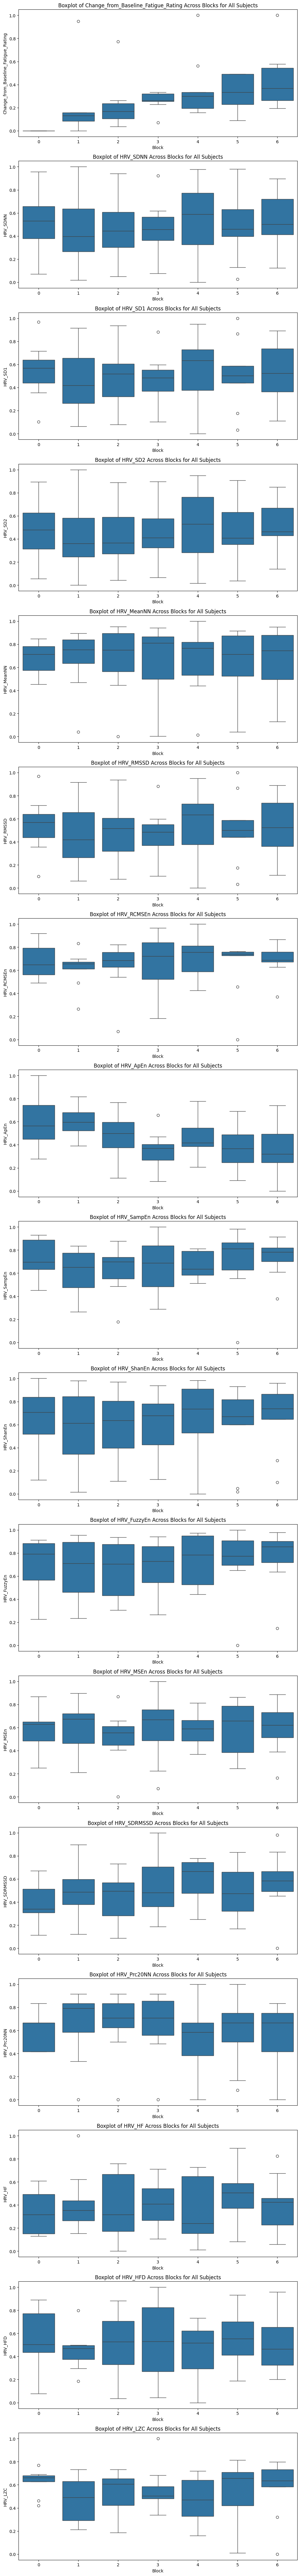

In [8]:
from sklearn.preprocessing import MinMaxScaler

features_to_plot = ['Change_from_Baseline_Fatigue_Rating', 'HRV_SDNN', 'HRV_SD1','HRV_SD2',  'HRV_MeanNN', 'HRV_RMSSD', 'HRV_RCMSEn', 'HRV_ApEn',	'HRV_SampEn',	'HRV_ShanEn',	'HRV_FuzzyEn', 'HRV_MSEn', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_HF', 'HRV_HFD', 'HRV_LZC']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
# Replace this with the actual feature columns in your dataset
og_data[features_to_plot] = scaler.fit_transform(og_data[features_to_plot])

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 5 * len(features_to_plot)))

# Create a boxplot for each feature across blocks for all subjects
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Block', y=feature, data=og_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} Across Blocks for All Subjects')
    axes[i].set_xlabel('Block')
    axes[i].set_ylabel(feature)

# Adjust the layout
plt.tight_layout()
plt.show()


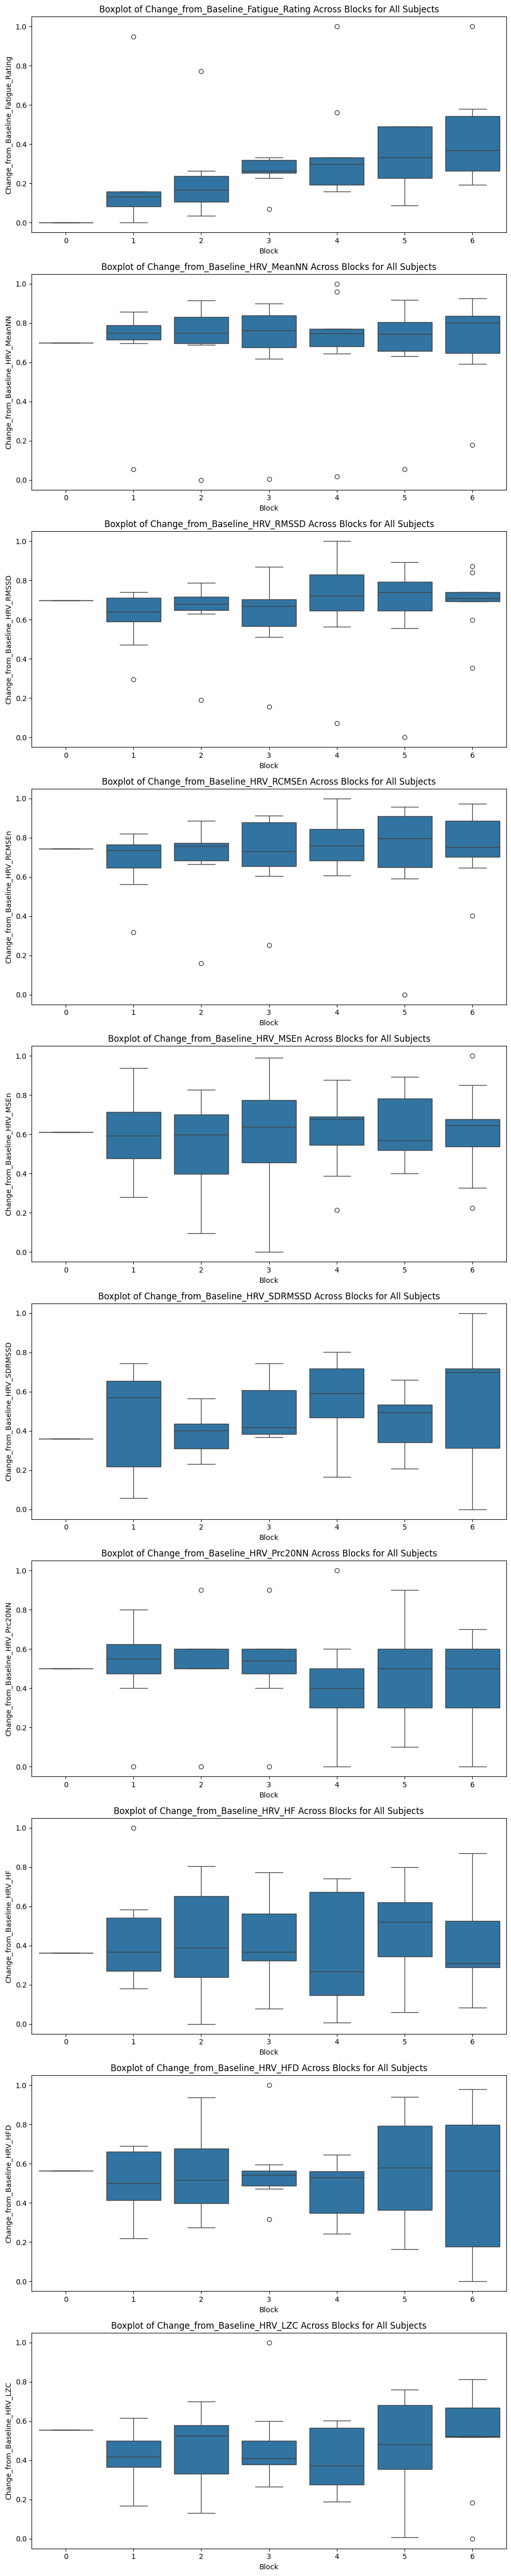

In [16]:
features_to_plot = ['Change_from_Baseline_Fatigue_Rating', 'Change_from_Baseline_HRV_MeanNN', 'Change_from_Baseline_HRV_RMSSD', 'Change_from_Baseline_HRV_RCMSEn', 'Change_from_Baseline_HRV_MSEn', 'Change_from_Baseline_HRV_SDRMSSD', 'Change_from_Baseline_HRV_Prc20NN', 'Change_from_Baseline_HRV_HF', 'Change_from_Baseline_HRV_HFD', 'Change_from_Baseline_HRV_LZC']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
# Replace this with the actual feature columns in your dataset
og_data[features_to_plot] = scaler.fit_transform(og_data[features_to_plot])

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 5 * len(features_to_plot)))

# Create a boxplot for each feature across blocks for all subjects
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Block', y=feature, data=og_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} Across Blocks for All Subjects')
    axes[i].set_xlabel('Block')
    axes[i].set_ylabel(feature)

# Adjust the layout
plt.tight_layout()
plt.show()

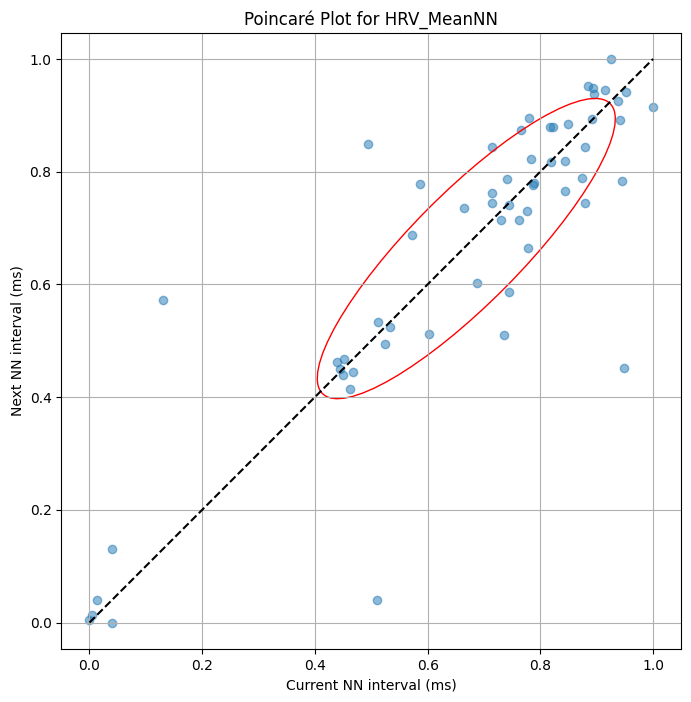

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse


# Make sure to drop the last NaN value which occurs due to the shifting
data = og_data.dropna(subset=['HRV_MeanNN'])

# Extract the HRV_MeanNN feature
hrv_mean_nn = data['HRV_MeanNN'].values

# Create the Poincaré plot data by plotting each NN interval against the next
hrv_mean_nn_next = hrv_mean_nn[1:]  # The next NN interval
hrv_mean_nn = hrv_mean_nn[:-1]      # The current NN interval, same length as hrv_mean_nn_next

plt.figure(figsize=(8, 8))
plt.scatter(hrv_mean_nn, hrv_mean_nn_next, alpha=0.5)

# Calculate the mean of the intervals
x_center = np.mean(hrv_mean_nn)
y_center = np.mean(hrv_mean_nn_next)

# Calculate the standard deviation of the intervals
std_nn = np.std(hrv_mean_nn)
std_next_nn = np.std(hrv_mean_nn_next)

# Fit an ellipse to the data points
covariance = np.cov(hrv_mean_nn, hrv_mean_nn_next)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)
ellipse = Ellipse(xy=(x_center, y_center),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
ellipse.set_edgecolor('red')
ellipse.set_facecolor('none')
plt.gca().add_patch(ellipse)

# Add the line y=x
plt.plot([hrv_mean_nn.min(), hrv_mean_nn.max()], [hrv_mean_nn.min(), hrv_mean_nn.max()], 'k--')

# Set labels and title
plt.xlabel('Current NN interval (ms)')
plt.ylabel('Next NN interval (ms)')
plt.title('Poincaré Plot for HRV_MeanNN')
plt.grid(True)
plt.axis('equal')  # Equal scaling of both axes

plt.show()



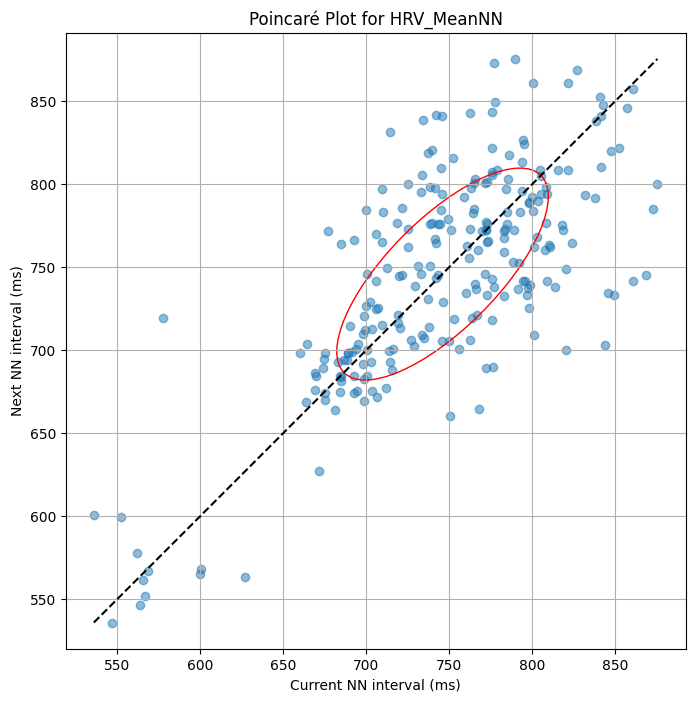

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

f_path = "HRV_features_60seconds_withDelta.xlsx"
og_data = pd.read_excel(f_path, header=0)
og_data.head()

# Make sure to drop the last NaN value which occurs due to the shifting
data = og_data.dropna(subset=['HRV_MeanNN'])

# Extract the HRV_MeanNN feature
hrv_mean_nn = data['HRV_MeanNN'].values

# Create the Poincaré plot data by plotting each NN interval against the next
hrv_mean_nn_next = hrv_mean_nn[1:]  # The next NN interval
hrv_mean_nn = hrv_mean_nn[:-1]      # The current NN interval, same length as hrv_mean_nn_next

plt.figure(figsize=(8, 8))
plt.scatter(hrv_mean_nn, hrv_mean_nn_next, alpha=0.5)

# Calculate the mean of the intervals
x_center = np.mean(hrv_mean_nn)
y_center = np.mean(hrv_mean_nn_next)

# Calculate the standard deviation of the intervals
std_nn = np.std(hrv_mean_nn)
std_next_nn = np.std(hrv_mean_nn_next)

# Fit an ellipse to the data points
covariance = np.cov(hrv_mean_nn, hrv_mean_nn_next)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)
ellipse = Ellipse(xy=(x_center, y_center),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
ellipse.set_edgecolor('red')
ellipse.set_facecolor('none')
plt.gca().add_patch(ellipse)

# Add the line y=x
plt.plot([hrv_mean_nn.min(), hrv_mean_nn.max()], [hrv_mean_nn.min(), hrv_mean_nn.max()], 'k--')

# Set labels and title
plt.xlabel('Current NN interval (ms)')
plt.ylabel('Next NN interval (ms)')
plt.title('Poincaré Plot for HRV_MeanNN')
plt.grid(True)
plt.axis('equal')  # Equal scaling of both axes

plt.show()

